In [4]:
import pandas as pd

In [5]:
path_to_file = 'student_scores.csv'
df = pd.read_csv(path_to_file)

In [6]:
df.head() 

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.shape

(25, 2)

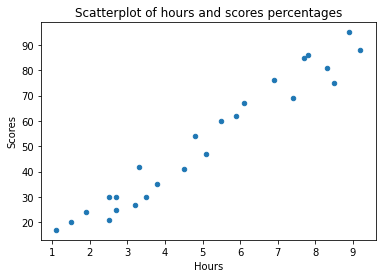

In [7]:
df.plot.scatter(x='Hours', y='Scores', title='Scatterplot of hours and scores percentages');

In [9]:
#import  BeesAlgo 
#import sklearn
print(df.corr())
#bee.check_is_fitted()


           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [10]:
print(df.describe())

           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


In [11]:
y = df['Scores'].values.reshape(-1, 1)
X = df['Hours'].values.reshape(-1, 1)

In [12]:
print(df['Hours'].values) # [2.5 5.1 3.2 8.5 3.5 1.5 9.2 ... ]
print(df['Hours'].values.shape) # (25,)

[2.5 5.1 3.2 8.5 3.5 1.5 9.2 5.5 8.3 2.7 7.7 5.9 4.5 3.3 1.1 8.9 2.5 1.9
 6.1 7.4 2.7 4.8 3.8 6.9 7.8]
(25,)


In [13]:
print(X.shape) # (25, 1)
print(X)      # [[2.5] [5.1]  [3.2] ... ]

(25, 1)
[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [15]:
SEED = 42

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = SEED)

In [17]:
print(X_train) # [[2.7] [3.3] [5.1] [3.8] ... ]
print(y_train) # [[25] [42] [47] [35] ... ]

[[2.7]
 [3.3]
 [5.1]
 [3.8]
 [1.5]
 [3.2]
 [4.5]
 [8.9]
 [8.5]
 [3.5]
 [2.7]
 [1.9]
 [4.8]
 [6.1]
 [7.8]
 [5.5]
 [7.7]
 [1.1]
 [7.4]
 [9.2]]
[[25]
 [42]
 [47]
 [35]
 [20]
 [27]
 [41]
 [95]
 [75]
 [30]
 [30]
 [24]
 [54]
 [67]
 [86]
 [60]
 [85]
 [17]
 [69]
 [88]]


In [3]:
from sklearn.linear_model import LinearRegression
from BeesAlgo import BeesAlgo

regressor = LinearRegression()
bee=BeesAlgo()

NameError: name 'sklearn' is not defined

In [2]:
regressor.fit(X_train, y_train)


NameError: name 'regressor' is not defined

In [20]:
print(regressor.intercept_)
print(regressor.coef_)

[2.82689235]
[[9.68207815]]


In [21]:
def calc(slope, intercept, hours):
    return slope*hours+intercept

score = calc(regressor.coef_, regressor.intercept_, 9.5)
print(score) # [[94.80663482]]

[[94.80663482]]


In [22]:
score = regressor.predict([[9.5]])
print(score) # 94.80663482

[[94.80663482]]


In [23]:
y_pred = regressor.predict(X_test)

In [24]:
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

   Actual  Predicted
0      81  83.188141
1      30  27.032088
2      21  27.032088
3      76  69.633232
4      62  59.951153


In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [26]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 3.92
Mean squared error: 18.94
Root mean squared error: 4.35
